# Assigment 8: Choose Your ML Problem and Data

In this unit's lab, you will implement a model to solve a machine learning problem of your choosing. First, you will have to make some decisions, such as which model to choose and which data preparation techniques may be necessary, and formulate a project plan accordingly. 

In this assignment, you will select a data set and choose a predictive problem that the data set supports. You will then inspect the data with your problem in mind and begin to formulate your  project plan. You will create this project plan in the written assignment that follows.


### Import Packages

Before you get started, import a few packages. You can import additional packages that you have used in this course that you may need for this task.

In [122]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Choose Your Data Set and Load the Data

You will have the option to choose one of four data sets that you have worked with in this program:

* The "adult" data set that contains Census information from 1994: `adultData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load the Data Set

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [124]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "adultData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename, header=0)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [125]:
df['price'].unique

<bound method Series.unique of 0         150.0
1          75.0
2         275.0
3          68.0
4          75.0
          ...  
28017      89.0
28018    1000.0
28019      64.0
28020      84.0
28021      70.0
Name: price, Length: 28022, dtype: float64>

## Step 2: Choose Your Predictive Problem and Label 

Now that you have chosen your data set, you can: 

1. Choose what you would like to predict (i.e. the label) 
2. Identify your problem type: is it a classification or regression problem?

<b>Task:</b> In the markdown cell below, state what you are predicting (the label) and whether this is a classification or regression problem.

The column 'price' will be used as label. It is a Regression problem. Linear Regression will be used as model.

## Step 3: Inspect Your Data

In the code cell below, use some of the techniques you have learned in this course to take a look at your data. As you are investigating your data, consider the following to help you formulate your project plan:

1. What are my features?
5. Which model (or models) should I select that is appropriate for my machine learning problem and data?
6. Which data preparation techniques may be needed for my model (e.g. perform one-hot encoding)?
7. Which techniques should I use to evaluate my model's performance and improve my model?

Note: You will use this notebook to take a glimpse at your data to help you start making some considerations. In the written assignment you will outline your project plan, and in the lab assignment you will perform a deeper exploratory analysis of the data before implementing data preparation and feature engineering techniques.

<b>Task</b>: Use the techniques you have learned in this course to inspect your data.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.


In [126]:
list = ['host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms',
        'minimum_nights','maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin',
        'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'n_host_verifications']

In [127]:
# YOUR CODE HERE
y = df['price']
X = df[list]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,minimum_nights,maximum_nights,minimum_minimum_nights,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
14190,True,0.0,0.0,True,True,1,1.5,20,29,20.0,...,5.00,5.00,5.00,False,1,0,1,0,0.05,8
5259,True,1.0,1.0,True,True,4,1.0,30,1125,30.0,...,5.00,5.00,5.00,False,1,1,0,0,0.02,5
12953,True,1.0,1.0,True,True,2,1.0,30,1125,30.0,...,4.67,5.00,4.67,True,1,0,1,0,0.07,7
26911,True,10.0,10.0,True,True,2,1.0,1,10,1.0,...,5.00,5.00,4.50,True,8,0,8,0,2.00,2
5183,True,2.0,2.0,True,True,2,2.0,30,30,30.0,...,4.85,4.62,4.77,False,1,0,1,0,0.19,7


In [128]:
#y_train.unique
from sklearn.linear_model import LinearRegression

In [129]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
y_lr_pred = model.predict(X_test)

In [131]:
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 108.06447161304611
[LR] R2: 0.36598067065976536


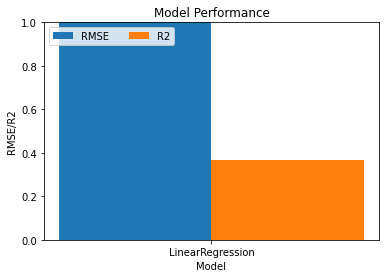

In [132]:
RMSE_Results = [lr_rmse]
R2_Results = [lr_r2]
labels = ['LinearRegression']

rg= np.arange(1)
width = 0.35
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Model")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()
